In [24]:
import pandas as pd
data = pd.read_excel('/content/Minor Project Data set (Stock Price Prediction) (1).xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)
data.dropna(inplace=True)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   floa

<ipython-input-24-7087767a6f22>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [25]:
data.fillna(method='ffill', inplace=True)
data.dropna(inplace=True)

<ipython-input-25-3d84f77c2258>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [27]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


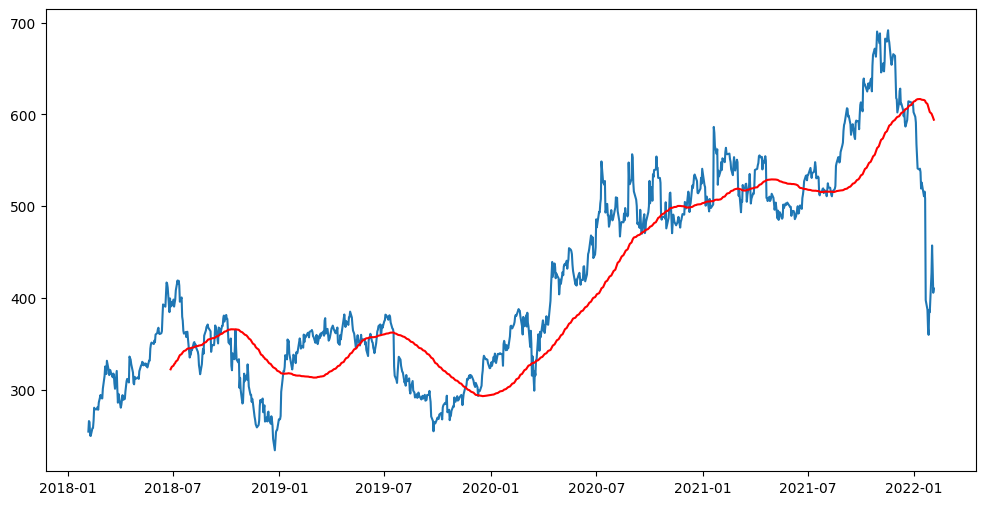

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(data.Close)
ma100 = data['Close'].rolling(window=100).mean()
plt.plot(ma100,'r')

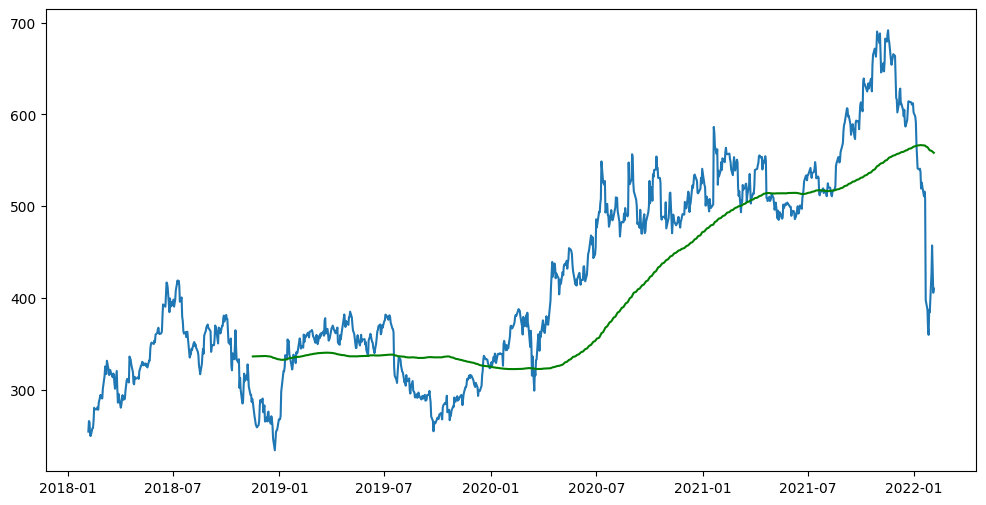

In [29]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
ma200 = data['Close'].rolling(window=200).mean()
plt.plot(ma200,'g')

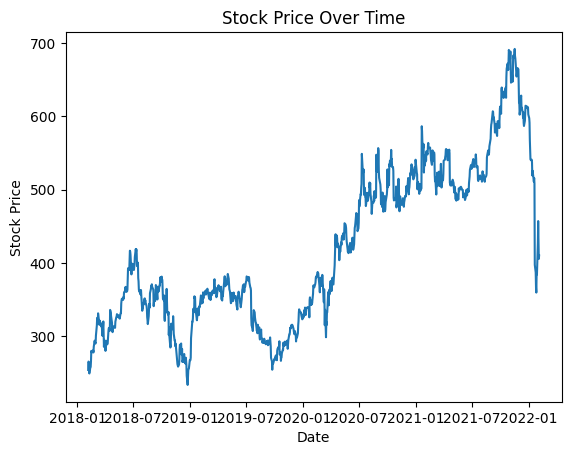

In [30]:
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [31]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int (len(data)*0.70): int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(706, 1)
(303, 1)


In [32]:
data_testing.head()

,Close
Date,
2020-11-23,476.619995
2020-11-24,482.880005
2020-11-25,485.000000
2020-11-27,491.359985
2020-11-30,490.700012


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [35]:
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data['Daily_Return'] = data['Close'].pct_change()
print(data['MA_200'])
print(data['Daily_Return'])
print(data['MA_200'])

Date
2018-02-05           NaN
2018-02-06           NaN
2018-02-07           NaN
2018-02-08           NaN
2018-02-09           NaN
                 ...    
2022-01-31    560.237698
2022-02-01    559.751148
2022-02-02    559.150698
2022-02-03    558.634198
2022-02-04    558.141148
Name: MA_200, Length: 1009, dtype: float64
Date
2018-02-05         NaN
2018-02-06    0.045072
2018-02-07   -0.004366
2018-02-08   -0.054657
2018-02-09   -0.002519
                ...   
2022-01-31    0.111302
2022-02-01    0.070211
2022-02-02   -0.060486
2022-02-03   -0.055602
2022-02-04    0.011267
Name: Daily_Return, Length: 1009, dtype: float64
Date
2018-02-05           NaN
2018-02-06           NaN
2018-02-07           NaN
2018-02-08           NaN
2018-02-09           NaN
                 ...    
2022-01-31    560.237698
2022-02-01    559.751148
2022-02-02    559.150698
2022-02-03    558.634198
2022-02-04    558.141148
Name: MA_200, Length: 1009, dtype: float64


              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume       MA_50      MA_200  Daily_Return  
count  1.009000e+03  960.000000  810.000000   1008.000000  
mean   7.570685e+06  420.197913  411.413249      0.000831  
std    5.465535e+06  104.021298   87.850109      0.026603  
min    1.144000e+06  280.936798  322.357099     -0.217905  
25%    4.091900e+06  337.616701  

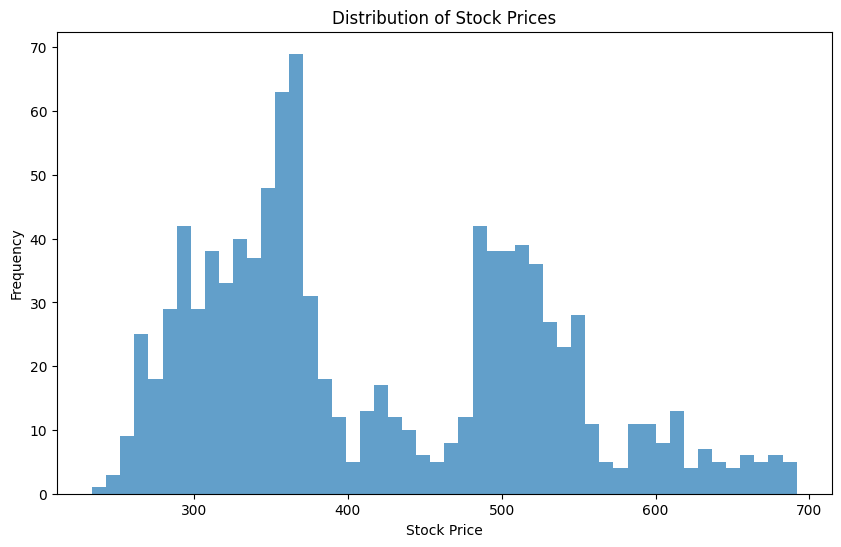

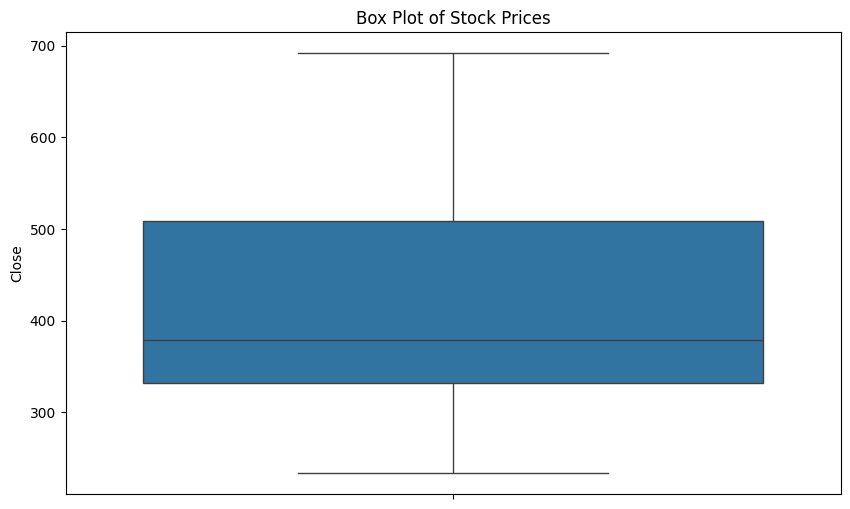

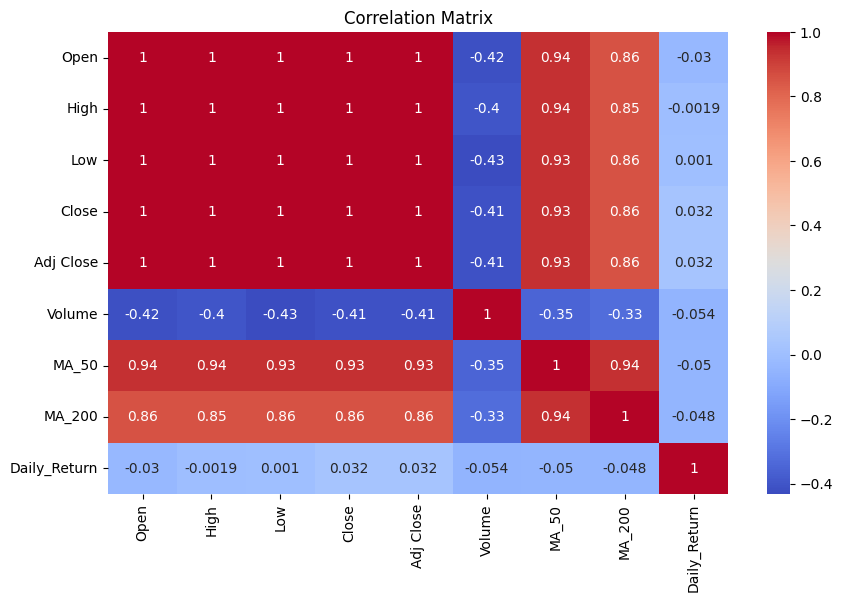

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
print(data.describe())
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, alpha=0.7)
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data['Close'])
plt.title('Box Plot of Stock Prices')
plt.show()
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.DataFrame({
    'Open': np.random.rand(100),
    'High': np.random.rand(100),
    'Low': np.random.rand(100),
    'Close': np.random.rand(100),
    'Adj Close': np.random.rand(100),
    'Volume': np.random.rand(100),
    'MA_50': np.random.rand(100),
    'MA_200': np.random.rand(100),
    'Daily_Return': np.random.rand(100)
})


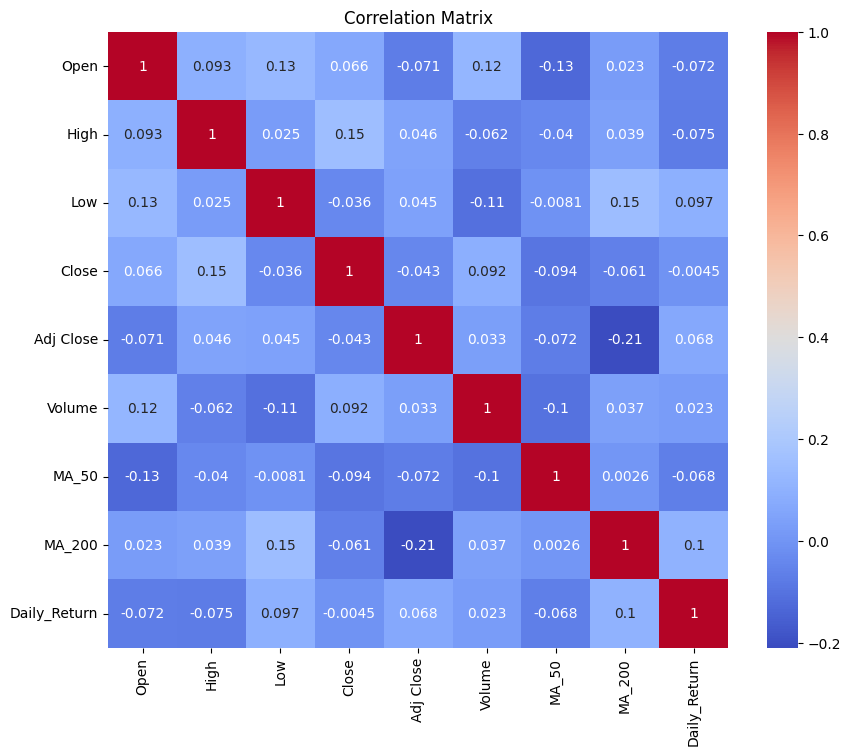

In [38]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [39]:
def remove_highly_correlated(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    upper_triangle_matrix = corr_matrix.where(upper_triangle)
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    data_reduced = data.drop(columns=to_drop)
    return data_reduced, to_drop

df_reduced, dropped_columns = remove_highly_correlated(df, threshold=0.9)
print("Dropped Columns due to high correlation: ", dropped_columns)
print("Reduced DataFrame:")
print(df_reduced.head())
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
print("Shape of original data:", df_scaled.shape)
print("Shape of reduced data:", df_pca.shape)
print("Number of principal components:", pca.n_components_)
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Feature"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif
df_reduced_scaled = pd.DataFrame(df_scaled, columns=df_reduced.columns)
vif_data = calculate_vif(df_reduced_scaled)
print("Variance Inflation Factors:")
print(vif_data)
def remove_high_vif(data, vif_threshold=5):
    vif_data = calculate_vif(data)
    while vif_data['VIF'].max() > vif_threshold:
        remove = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
        print(f"Dropping {remove} due to high VIF of {vif_data['VIF'].max()}")
        data = data.drop(columns=[remove])
        vif_data = calculate_vif(data)
    return data, vif_data

df_final, final_vif = remove_high_vif(df_reduced_scaled)
print("Final dataset after reducing multicollinearity:")
print(df_final.head())
print("Final VIF values:")
print(final_vif)

Dropped Columns due to high correlation:  []
Reduced DataFrame:
       Open      High       Low     Close  Adj Close    Volume     MA_50  \
0  0.033591  0.649580  0.231289  0.437584   0.591154  0.096234  0.900100   
1  0.476058  0.079645  0.613041  0.657431   0.701318  0.557212  0.748206   
2  0.750788  0.503963  0.305343  0.917592   0.830577  0.954564  0.185102   
3  0.051390  0.430976  0.497067  0.393913   0.707061  0.542679  0.991785   
4  0.443794  0.557538  0.152918  0.603151   0.562057  0.305818  0.833005   

     MA_200  Daily_Return  
0  0.973062      0.941471  
1  0.455135      0.270921  
2  0.186924      0.721794  
3  0.164123      0.453016  
4  0.248593      0.242172  
Shape of original data: (100, 9)
Shape of reduced data: (100, 9)
Number of principal components: 9
Variance Inflation Factors:
        Feature       VIF
0          Open  1.078023
1          High  1.053687
2           Low  1.075227
3         Close  1.053337
4     Adj Close  1.086823
5        Volume  1.060792
6 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
df_reduced = df.drop(columns=['Open', 'High', 'Low', 'Adj Close'])
X = df_reduced.drop(columns=['Close'])
y = df_reduced['Close']
df = pd.DataFrame({
    'Open': np.random.rand(100),
    'High': np.random.rand(100),
    'Low': np.random.rand(100),
    'Close': np.random.rand(100),
    'Adj Close': np.random.rand(100),
    'Volume': np.random.rand(100),
    'MA_50': np.random.rand(100),
    'MA_200': np.random.rand(100),
    'Daily_Return': np.random.rand(100)
})
df_reduced = df.drop(columns=['Open', 'High', 'Low', 'Adj Close'])
X = df_reduced.drop(columns=['Close'])
y = df_reduced['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print("Model Coefficients:", model.coef_)


Train MSE: 0.08
Test MSE: 0.09
Test MAE: 0.26
Model Coefficients: [-0.02575726  0.03023221 -0.03597339  0.00691849]


In [42]:
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7579
Date:                Mon, 16 Sep 2024   Prob (F-statistic):              0.556
Time:                        17:42:44   Log-Likelihood:                -10.031
No. Observations:                  80   AIC:                             30.06
Df Residuals:                      75   BIC:                             41.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5457      0.032     17.229      0.0

In [43]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))
mean_actual = np.mean(y_test)
accuracy = 100 * (1 - mae_test / mean_actual)
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R²: {r2_train:.2f}")
print(f"Test R²: {r2_test:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")
print("Model Coefficients:", model.params)


Train MSE: 0.08
Test MSE: 0.09
Test RMSE: 0.30
Test MAE: 0.26
Train R²: 0.04
Test R²: -0.07
Adjusted R²: -0.36
Model Accuracy: 52.77%
Model Coefficients: const    0.545689
x1      -0.025757
x2       0.030232
x3      -0.035973
x4       0.006918
dtype: float64


In [46]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [49]:
!pip install gradio==3.35.2
!pip install --upgrade gradio-client
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="gradio_client")

In [62]:
import ipywidgets as widgets
from IPython.display import display
import pickle
import pandas as pd
import statsmodels.api as sm
model = pickle.load(open('trained_model.sav', 'rb'))
def predict_stock_price(input_data):
  input_data = sm.add_constant(input_data)
  prediction = model.predict(input_data)[0]
  print(f"Predicted Stock Price: {prediction:.2f}")
Volume_slider = widgets.FloatSlider(min=0, max=1, step=0.01, description='Volume:')
MA_50_slider = widgets.FloatSlider(min=0, max=1, step=0.01, description='MA_50:')
MA_200_slider = widgets.FloatSlider(min=0, max=1, step=0.01, description='MA_200:')
Daily_Return_slider = widgets.FloatSlider(min=0, max=1, step=0.01, description='Daily_Return:')
out = widgets.interactive_output(
    lambda Volume, MA_50, MA_200, Daily_Return: predict_stock_price(sm.add_constant(pd.DataFrame({'Volume': [Volume], 'MA_50': [MA_50], 'MA_200': [MA_200], 'Daily_Return': [Daily_Return]}))),
    {
        'Volume': Volume_slider,
        'MA_50': MA_50_slider,
        'MA_200': MA_200_slider,
        'Daily_Return': Daily_Return_slider
    }
)

display(Volume_slider, MA_50_slider, MA_200_slider, Daily_Return_slider, out)

FloatSlider(value=0.0, description='Volume:', max=1.0, step=0.01)

FloatSlider(value=0.0, description='MA_50:', max=1.0, step=0.01)

FloatSlider(value=0.0, description='MA_200:', max=1.0, step=0.01)

FloatSlider(value=0.0, description='Daily_Return:', max=1.0, step=0.01)

Output()